<h1 style="text-align: center;">Data import and preprocessing</h1>

## 1. Dataset explanations <a id='dataset_explanations'></a>

<h4><b><u>Activities Dataset :</u></b></h4>

- <u>Type</u> : Activity type, e.g. running, cycling, swimming, etc...
- <u>Date</u> : Date of the activity
- <u>Activity_distance</u> : Distance of the activity in kilometers (or meters for swimming)
- <u>Activity_calories</u> : Calories consumed during activity
- <u>Duration</u> : Total duration of the activity (hh:mm:ss)
- <u>Activity_average_heart_rate</u> : Average heart rate during the activity
- <u>Activity_maximum_heart_rate</u> : Maximum heart rate reached during the activity
- <u>Aerobic TE</u> : As provided by Garmin, the training effect is a measure that provides informations about the effect on our physicial condition. 
    This Training Effect is between 0 and 5, with :
    - 0 to 0.9 : No improvement
    - 1 to 1.9 : Little improvement
    - 2 to 2.9 : Maintain
    - 3 to 3.9 : Improvement
    - 4 to 4.9 : Great improvement
    - 5 : Objective exceeded
- <u>Average_running_cadence</u> : Only presents in running activity, represent the average steps by minutes
- <u>Maximum_running_cadence</u> : Only presents in running activity, represent the maximum steps by minutes reached
- <u>Average_pace</u> : Average pace during the activity. 
    - min/km for running
    - km/h for cycling
    - min/100m for swimming
- <u>Best_pace</u> : Best pace reached during the activity.
- <u>Maximum_temperature</u> : Maximum outside temperature recorded by the watch during the activity.
- <u>Activity_minimum_respiratory_frequency</u> : Minimum respiratory frequency recorded during activity. In breathing/minutes.
- <u>Activity_average_respiratory_frequency</u> : Average respiratory frequency recorded during activity. In breathing/minutes.
- <u>Activity_maximum_respiratory_frequency</u> : Maximum respiratory frequency recorded during activity. In breathing/minutes.
- <u>Travel_time</u> : Time spent in movement during the activity (hh:mm:ss)
- <u>Elapsed_time</u> : Total time of the activity (hh:mm:ss)
- <u>Minimum_altitude</u> : Minimum altitude recorded by the watch during the activity.
- <u>Maximum_altitude</u> : Maximum altitude recorded by the watch during the activity.
<hr>
<h4><b><u>Calories Dataset :</u></b></h4>

- <u>Date</u> : Date associated
- <u>Active_calories</u> : Calories consumed in activity
- <u>Resting_calories</u> : Base calories consumption of the body
- <u>Total_calories</u> : Total calories consumed during the day, sum of the active calories and resting calories.
<hr>
<h4><b><u>Heart rate Dataset :</u></b></h4>

- <u>Date</u> : Date associated
- <u>Resting_HR</u> : Heart rate when the body is at rest, usually when we are sleeping or lying in bed after waking up. <a style="color: rgb(255,0,0)"><b>This variable is automatically eliminated as it is recorded during sleep.</b></a>
- <u>Highest_HR</u> : Highest reached heart rate of the day.
<hr>
<h4><b><u>Sleep Dataset</u></b></h4>

- <u>Score</u> : Represents a sleeping score on a scale from 0 to 100, that represents how well we slept.
- <u>Date</u> : Wake-up date. Meaning that all the other dataset are shifted by one day in relation to this dataset.
- <u>Base_HR</u> : Heart rate when the body is at rest, usually when we are sleeping or lying in bed after waking up.
- <u>HRV (Heart Rate Variability)</u> : The HRV represents the variation in time between consecutive heartbeats.  HRV is a great indicator of the balance between the activity of the two branches of the autonomic nervous system. It is an indirect measurement of stress, higher HRV means lower stress. It is also used to determine sleep stages. (source : https://support.garmin.com/en-US/?faq=04pnPSBTYSAYL9FylZoUl5)
- <u>Quality</u> : The quality is highly related to score as it is bins of the latter.
    - Poor : 0 - 59
    - Fair : 60 - 79
    - Good : 80 - 89
    - Excellent : 90 - 100
- <u>Sleep_duration</u> : Time spent sleeping.
- <u>Bedtime</u> : Time we fell asleep. (hh:mm)
- <u>Waking_hour</u> : Wake-up time. (hh:mm)  <a style="color: rgb(255,0,0)"><b>This variable is automatically eliminated as it is a result of sleep.</b></a>

In [211]:
%load_ext autoreload
%autoreload 2

from functions import *

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
activities_vars = ["Type d'activité", "Date", "Distance", "Calories", "Durée", "Fréquence cardiaque moyenne", "Fréquence cardiaque maximale",
                   "TE aérobie", "Cadence de course moyenne", "Cadence de course maximale", "Allure moyenne", "Meilleure allure",
                   "Température maximale", "Fréquence respiratoire moyenne", "Fréquence respiratoire minimale", "Fréquence respiratoire maximale",
                   "Temps de déplacement", "Temps écoulé", "Altitude minimale", "Altitude maximale"]

activities_vars_eng = ["Type", "Date", "Activity_distance", "Activity_calories", "Duration", "Activity_average_heart_rate", "Activity_maximum_heart_rate",
                       "Aerobic_TE", "Average_running_cadence", "Maximum_running_cadence", "Average_pace", "Best_pace",
                       "Maximum_temperature", "Activity_average_respiratory_frequency", "Activity_minimum_respiratory_frequency", "Activity_maximum_respiratory_frequency",
                       "Travel_time", "Elapsed_time", "Minimum_altitude", "Maximum_altitude"]

In [213]:
activities_vars_rename = dict(zip(activities_vars, activities_vars_eng))

In [214]:
# Import activities data and rename variables in english
activities = pd.read_csv("Data/Activities.csv", sep=",", header=0, encoding="utf8", na_values='--')
activities = activities[activities_vars]
activities = activities.rename(columns=activities_vars_rename)
print(activities.shape)
activities.head(3)

(380, 20)


,Type,Date,Activity_distance,Activity_calories,Duration,Activity_average_heart_rate,Activity_maximum_heart_rate,Aerobic_TE,Average_running_cadence,Maximum_running_cadence,Average_pace,Best_pace,Maximum_temperature,Activity_average_respiratory_frequency,Activity_minimum_respiratory_frequency,Activity_maximum_respiratory_frequency,Travel_time,Elapsed_time,Minimum_altitude,Maximum_altitude
0,Course à pied,2024-05-09 15:49:57,9.45,720,00:49:25,162,193,3.9,161.0,172.0,5:14,3:58,29.0,33.0,19.0,42.0,00:48:16,00:49:25,34.0,53
1,Course à pied,2024-05-08 18:40:10,7.33,522,00:43:53,133,151,2.5,159.0,190.0,5:59,5:04,26.0,26.0,14.0,34.0,00:43:24,00:43:54,45.0,58
2,Course à pied,2024-05-07 18:48:17,1.44,106,00:07:15.2,148,174,2.1,162.0,221.0,5:03,3:55,26.0,NaN,NaN,NaN,00:06:55.3,00:07:15.2,41.0,52


In [215]:
# Import calories data and rename variables in english
calories = pd.read_csv("Data/Calories_pv.csv", sep=";", header=0, encoding="latin1")
calories = calories.rename(columns={"Calories actives": "Active_calories",
                                    "Calories au repos": "Resting_calories",
                                    "Calories dépensées au total": "Total_calories"})
print(calories.shape)
calories.head(3)

(487, 4)


,Date,Active_calories,Resting_calories,Total_calories
0,15 Avr.,772,"1,837","2,609"
1,14 Avr.,"1,491","2,187","3,678"
2,13 Avr.,620,"2,187","2,807"


In [216]:
# Import heart rate data and rename variables in english
hr = pd.read_csv("Data/FC.csv", sep=";", header=0, encoding="utf8", na_values="--")
hr = hr.rename(columns={"Repos": "Resting_HR",
                        "Le plus haut": "Highest_HR"})
print(hr.shape)
hr.head(3)

(470, 3)


,Date,Resting_HR,Highest_HR
0,16 Avr.,52 bpm,69 bpm
1,15 Avr.,52 bpm,167 bpm
2,14 Avr.,61 bpm,142 bpm


In [217]:
# Import sleep data and rename variables in english
sleep = pd.read_csv("Data/Sommeil.csv", sep=",", header=0, encoding="utf8", na_values="--")

sleep_list = [pd.read_csv(f"Data/Sommeil ({idx}).csv", sep=",", header=0, encoding="utf8", na_values="--") for idx in range(1, 17+1)]
sleep_list.insert(0, sleep) # Put the latest data at the beginning of the list

sleep = pd.concat(sleep_list)
sleep = sleep.rename(columns={"Score de sommeil 4\xa0semaines": "Date",
                              "Fréquence cardiaque au repos": "Base_HR",
                              "Statut de la variabilité de la fréquence cardiaque": "HRV",
                              "Qualité": "Quality",
                              "Durée": "Sleep_duration",
                              "Heure de coucher": "Bedtime",
                              "Heure de lever": "Waking_hour"}).drop(columns="Oxymètre de pouls")

sleep = sleep[["Date", "Score", "Quality", "Sleep_duration", "Bedtime", "Waking_hour"]]

print(sleep.shape)
sleep.head(3)


(504, 6)


,Date,Score,Quality,Sleep_duration,Bedtime,Waking_hour
0,15 Avr.,89.0,Bon,8h 4min.,23:26,7:31
1,14 Avr.,41.0,Mauvais,7h 6min.,3:23,10:39
2,13 Avr.,74.0,Passable,8h 30min.,23:08,8:20


## 2.1 Data preprocessing <a id="data_preprocessing"></a>
<a href="#table_contents">Table of contents</a>

### Activities dataset

In [218]:
# Convert to datetime type the Date column
activities['Date'] = pd.to_datetime(activities['Date']).dt.date
activities['Date'] = pd.to_datetime(activities['Date']) # convert back to datetime64[ns] instead of float

In [219]:
activities.head(3)

,Type,Date,Activity_distance,Activity_calories,Duration,Activity_average_heart_rate,Activity_maximum_heart_rate,Aerobic_TE,Average_running_cadence,Maximum_running_cadence,Average_pace,Best_pace,Maximum_temperature,Activity_average_respiratory_frequency,Activity_minimum_respiratory_frequency,Activity_maximum_respiratory_frequency,Travel_time,Elapsed_time,Minimum_altitude,Maximum_altitude
0,Course à pied,2024-05-09,9.45,720,00:49:25,162,193,3.9,161.0,172.0,5:14,3:58,29.0,33.0,19.0,42.0,00:48:16,00:49:25,34.0,53
1,Course à pied,2024-05-08,7.33,522,00:43:53,133,151,2.5,159.0,190.0,5:59,5:04,26.0,26.0,14.0,34.0,00:43:24,00:43:54,45.0,58
2,Course à pied,2024-05-07,1.44,106,00:07:15.2,148,174,2.1,162.0,221.0,5:03,3:55,26.0,NaN,NaN,NaN,00:06:55.3,00:07:15.2,41.0,52


### Calories dataset

In [220]:
month_dict = {"jan.": 1, "fév.": 2, "mar.": 3, "avr.": 4, "mai": 5, "juin": 6, "juil": 7, "août": 8, "sep.": 9, "oct": 10, "nov.": 11, "déc.": 12}

In [221]:
def get_day(row, date_var, month_dict):
    """ Retrieve the day of the Date variables in the dataframes """

    if len(row[date_var].split('-')) > 1:
        splitted_date = row[date_var].split('-')
        day = splitted_date[0].lstrip('0')
        return day
    else:
        splitted_date = row[date_var].split(' ')
        day = splitted_date[0]
        return day
    

def get_month(row, date_var, month_dict):
    """ Retrieve the month number of the Date variables in the dataframes """
    
    if len(row[date_var].split('-')) > 1:
        splitted_date = row[date_var].split('-')
        month = month_dict[splitted_date[1].lower()]
        return month
    else:
        splitted_date = row[date_var].split(' ')
        month = month_dict[splitted_date[1].lower()]
        return month
    
def new_date(row):
    """ Use the newly created Year, Month and Day to create the new Date in Datetime64[ns] with format YYYY-MM-DD """
    
    return pd.to_datetime(f"{int(row['Year'])}-{str(row['Month']).zfill(2)}-{str(row['Day']).zfill(2)}")

In [222]:
# Initiailize columns
calories['Day'] = np.zeros(calories.shape[0])
calories['Month'] = np.zeros(calories.shape[0])
calories['Year'] = np.zeros(calories.shape[0])

calories['Day'] = calories.apply(lambda row: get_day(row, 'Date', month_dict), axis=1)
calories['Month'] = calories.apply(lambda row: get_month(row, 'Date', month_dict), axis=1)
# Manually set the years 
calories.loc[467:, 'Year'] = 2022
calories.loc[:102, 'Year'] = 2024

calories['Year'] = np.where(calories['Year'] == 0, 2023, calories['Year'])
calories["Date"] = calories.apply(lambda row: new_date(row), axis=1)

calories = calories.drop(columns=['Day', 'Month', 'Year'])

In [223]:
calories.head(3)

,Date,Active_calories,Resting_calories,Total_calories
0,2024-04-15,772,"1,837","2,609"
1,2024-04-14,"1,491","2,187","3,678"
2,2024-04-13,620,"2,187","2,807"


### HR Dataset

In [224]:
# Initiailize columns
hr['Day'] = np.zeros(hr.shape[0])
hr['Month'] = np.zeros(hr.shape[0])
hr['Year'] = np.zeros(hr.shape[0])

# Manually set the years
hr.loc[451:, 'Year'] = 2022
hr.loc[:99, 'Year'] = 2024
hr['Year'] = np.where(hr['Year'] == 0, 2023, hr['Year'])

hr['Month'] = hr.apply(lambda row: get_month(row, 'Date', month_dict), axis=1)
hr['Day'] = hr.apply(lambda row: get_day(row, 'Date', month_dict), axis=1)

# Create the new date variable
hr["Date"] = hr.apply(lambda row: new_date(row), axis=1)

hr = hr.drop(columns=['Day', 'Month', 'Year'])

In [225]:
hr.head(3)

,Date,Resting_HR,Highest_HR
0,2024-04-16,52 bpm,69 bpm
1,2024-04-15,52 bpm,167 bpm
2,2024-04-14,61 bpm,142 bpm


### Sleep dataset

In [226]:
# The first 15 days the watch didn't record any score
sleep = sleep.reset_index(drop=True).loc[:len(sleep)-15, :] 

# We remove rows where we don't have a sleeping score as we won't be able to use them further.
sleep = sleep.loc[sleep['Score'].notna(), :].reset_index(drop=True)

In [227]:
# Create 3 new columns that receive Day, Month and Year of the Date column
sleep['Day'] = np.zeros(sleep.shape[0])
sleep['Month'] = np.zeros(sleep.shape[0])
sleep['Year'] = np.zeros(sleep.shape[0])

sleep.loc[:87, 'Year'] = 2024
sleep.loc[389:, 'Year'] = 2022

# If year is still 0 then it is 2023
sleep['Year'] = np.where(sleep['Year'] == 0, 2023, sleep['Year'])

# Retrieve Month and Day from the Date
sleep['Month'] = sleep.apply(lambda row: get_month(row, 'Date', month_dict), axis=1)
sleep['Day'] = sleep.apply(lambda row: get_day(row, 'Date', month_dict), axis=1)

# Convert Date to the wanted datetime format
sleep["Date"] = sleep.apply(lambda row: new_date(row), axis=1)


In [228]:
# sleeping score for a day correspond do the night from day-1 to day.
# Night of 15th of April is a result of activities of 14th of April
# So to compare effects of activities of the day we have to substract one day to every sleep data
sleep['Date'] = sleep['Date'] - pd.Timedelta(days=1)

sleep = sleep.drop(columns=['Day', 'Month', 'Year'])

## 2.2 Merged dataframes <a id='merged_dataframes'></a>
<a href="#table_contents">Table of contents</a>

In [229]:
merged_1 = pd.merge(sleep, activities, how='left', on='Date')
merged_2 = pd.merge(merged_1, hr, how='left', on='Date')
df_merged = pd.merge(merged_2, calories, how='left', on='Date').drop(columns=['Resting_HR'])

In [230]:
df_merged.head(3)

,Date,Score,Quality,Sleep_duration,Bedtime,Waking_hour,Type,Activity_distance,Activity_calories,Duration,...,Activity_minimum_respiratory_frequency,Activity_maximum_respiratory_frequency,Travel_time,Elapsed_time,Minimum_altitude,Maximum_altitude,Highest_HR,Active_calories,Resting_calories,Total_calories
0,2024-04-14,89.0,Bon,8h 4min.,23:26,7:31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,142 bpm,"1,491","2,187","3,678"
1,2024-04-13,41.0,Mauvais,7h 6min.,3:23,10:39,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,126 bpm,620,"2,187","2,807"
2,2024-04-12,74.0,Passable,8h 30min.,23:08,8:20,Course à pied,3.00,217,00:20:28,...,NaN,NaN,00:20:03,00:20:28,40.0,52,152 bpm,607,"2,187","2,794"


In [231]:
# Label Encoding on quality
print(f"Quality missing values : {df_merged['Quality'].isnull().mean()}")

qualities = [['Mauvais', 'Passable', 'Bon', 'Excellent']]

quality_OE = OrdinalEncoder(categories=qualities)
quality_OE.fit(np.array(df_merged['Quality']).reshape(-1, 1))

df_merged['Quality'] = quality_OE.transform(np.array(df_merged['Quality']).reshape(-1, 1))

Quality missing values : 0.0


In [232]:
for qual, number in zip(quality_OE.categories_[0] ,quality_OE.transform(np.array(quality_OE.categories_).reshape(-1, 1))):
    print(f"{qual} : {number[0]}")

Mauvais : 0.0
Passable : 1.0
Bon : 2.0
Excellent : 3.0


In [233]:
def sleep_duration_in_hours_minutes(row):
    """ Convert sleep duration from xh ymin. to hours,minutes """

    if not isinstance(row['Sleep_duration'], (int, float)):
        h, minutes = row['Sleep_duration'].split(' ')
        return float(h.strip('h')) + float(minutes.strip('min.')) / 60

def bed_related_to_minutes(row, bed_col):
    """ Convert bed related columns from hh:mm to hours,minutes """
    
    if not isinstance(row[bed_col], float):
        h, minutes = row[bed_col].split(':')
        return float(h) + float(minutes) / 60

In [234]:
# Convert sleep duration in minutes
print(f"Sleep duration missing values : {df_merged['Sleep_duration'].isnull().mean()}")

df_merged['Sleep_duration'] = df_merged.apply(lambda row: sleep_duration_in_hours_minutes(row), axis=1)

# Remove rows where Bedtime is NaN, as we further compute a sleeping duration variable
df_merged = df_merged.loc[df_merged['Bedtime'].notna()].reset_index(drop=True)
print(f"Bedtime missing values : {df_merged['Bedtime'].isnull().mean()}")

df_merged['Bedtime'] = df_merged.apply(lambda row: bed_related_to_minutes(row, 'Bedtime'), axis=1)
df_merged['Waking_hour'] = df_merged.apply(lambda row: bed_related_to_minutes(row, 'Waking_hour'), axis=1)

Sleep duration missing values : 0.0
Bedtime missing values : 0.0


In [235]:
# Initialize the new Awake time variable
df_merged['Awake_time'] = np.NaN

# Calculate the awake time be computing the difference between the Waking_hour of day d-1 and the bedtime of day d
for i in range(1, len(df_merged)):
    waking_prev_day = df_merged.at[i-1, 'Waking_hour']
    bedtime_curr_day = df_merged.at[i, 'Bedtime']
    # If the bedtime is after midnight we add 24
    if 0 < bedtime_curr_day < 10:
        bedtime_curr_day += 24
    df_merged.at[i, 'Awake_time'] = np.abs(waking_prev_day - bedtime_curr_day)

df_merged['Awake_time'] = np.where(pd.isna(df_merged['Awake_time']), df_merged['Awake_time'].mean(), df_merged['Awake_time'])

In [236]:
# Type selections and label encoding
df_merged['Type'] = np.where(pd.isna(df_merged['Type']), 'No_activities', df_merged['Type'])
type_part = df_merged['Type'].value_counts(dropna=False).reset_index()

In [237]:
type_part

,Type,count
0,Course à pied,234
1,No_activities,184
2,Cyclisme,17
3,Musculation,14
4,Nat. piscine,7
5,Marche à pied,4
6,Rameur d'intérieur,1
7,Randonnée,1


C:\Users\flori\AppData\Local\Temp\ipykernel_35080\3626716656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=type_part, x='Type', y='count', edgecolor='black', palette='deep')


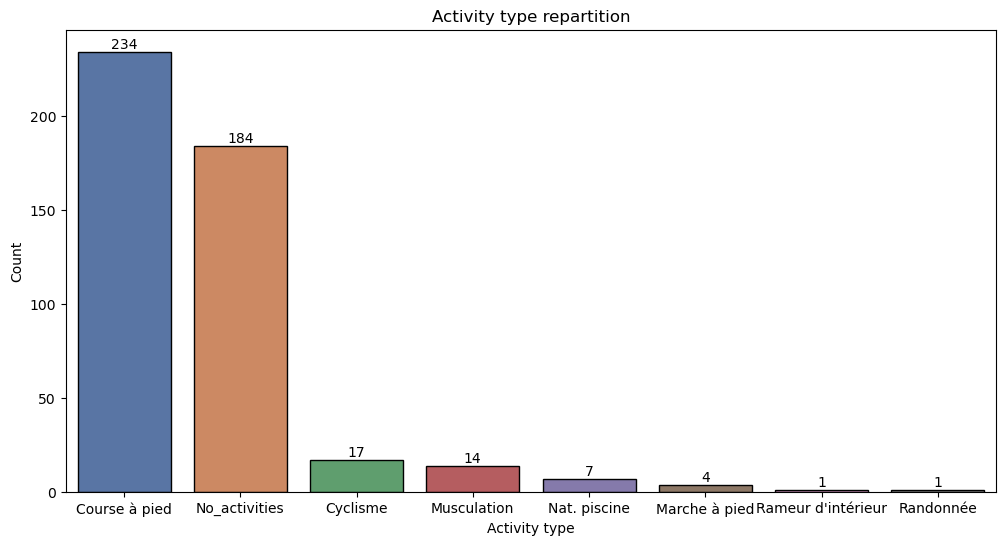

In [238]:
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=type_part, x='Type', y='count', edgecolor='black', palette='deep')
plt.title("Activity type repartition")
plt.xlabel("Activity type")
plt.ylabel("Count")

for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.show()

Using the graph above, I choose to delete the following activities as they have too few occurrences: Walking, Indoor Rowing and Hiking.

I replace them with “No_activities”. 

In [239]:
to_remplace_types = ["Marche à pied", "Rameur d'intérieur", "Randonnée"]

df_merged['Type'] = np.where(df_merged['Type'].isin(to_remplace_types), 'No_activities', df_merged['Type'])

In [240]:
def convert_distance(row):
    """ Convert distance from string to float, with a results expressed in km """
    
    if row['Activity_distance'] != 0:
        # If activity is swimming and less than 1km were swimmed
        if row['Type'] == 'Nat. piscine' and not "," in row['Activity_distance']:
            return float(row['Activity_distance']) / 1000
        
        if "," in row['Activity_distance']:
            return float(row['Activity_distance'].replace(",", "."))
        
        return float(row['Activity_distance'])
    return 0

In [241]:
# Replace missing values by 0
df_merged['Activity_distance'] = np.where(pd.isna(df_merged['Activity_distance']), 0, df_merged['Activity_distance'])

df_merged['Activity_distance'] = df_merged.apply(lambda row: convert_distance(row), axis=1)

print(f"Activity distance missing values : {df_merged['Activity_distance'].isnull().mean()}")

Activity distance missing values : 0.0


In [242]:
def convert_calories(row, cal_var):
    """ Convert calories to integers """
    
    if not pd.isna(row[cal_var]) and not isinstance(row[cal_var], (float, int)):
        # handles cases where the calories finish by a 0 and the 0 is therefore truncated
        # So we have to append 0 at the end while the calories is not format 1,234
        if "," in row[cal_var] and len(row[cal_var]) != 5:
            while len(row[cal_var]) < 5:
                row[cal_var] += '0'

        # if there is a coma in calories meaning that it is greater than 1 000 then we delete
        # the coma. In the case where calories < 1000 where there's no coma, it's still transformed in integer
        return int(row[cal_var].replace(",", ""))
    
    return 0

In [243]:
calories_cols = ['Activity_calories', 'Active_calories', 'Resting_calories', 'Total_calories']  

# Replace by 0 rows where there is no activity and therefore no activity calories
df_merged['Activity_calories'] = np.where(pd.isna(df_merged['Activity_calories']), 0, df_merged['Activity_calories'])

for col in calories_cols:
    df_merged[col] = df_merged.apply(lambda row: convert_calories(row, col), axis=1)
    print(f"{col} missing values : {df_merged[col].isnull().mean()}")

# Handle cases where total calories is perfectly round like 3000
df_merged['Total_calories'] = np.where(df_merged['Total_calories'] <= 9, df_merged['Total_calories'] * 1000, df_merged['Total_calories'])

Activity_calories missing values : 0.0
Active_calories missing values : 0.0
Resting_calories missing values : 0.0
Total_calories missing values : 0.0


In [244]:
def durations_to_minutes(row, duration_var):
    """ Convert columns that represents a duration in minutes """
    
    if not pd.isna(row[duration_var]):
        h, m, s = row[duration_var].split(':')
        return int(h) * 60 + int(m) + float(s) / 60
    return 0

In [245]:
durations_cols = ['Duration', 'Travel_time', 'Elapsed_time']

for col in durations_cols:
    df_merged[col] = df_merged.apply(lambda row: durations_to_minutes(row, col), axis=1)
    print(f"{col} missing values : {df_merged[col].isnull().mean()}")

Duration missing values : 0.0
Travel_time missing values : 0.0
Elapsed_time missing values : 0.0


In [246]:
def pace_to_minutes_pace(row, pace_col):
    """ Convert pace to minutes,seconds / km """

    if not pd.isna(row[pace_col]):
        # For cycling the pace is expressed as km/h
        if row['Type'] == 'Cyclisme':
            return 60 / float(row[pace_col])
        
        # For swimming the pace is expressed as mm:ss / 100m
        elif row['Type'] == 'Nat. piscine':
            m, s = row[pace_col].split(':')
            return (int(m) + float(s) / 60) * 10

        else:
            m, s = row[pace_col].split(':')
            return int(m) + float(s) / 60
            
    return 0

In [247]:
pace_cols = ['Average_pace', 'Best_pace']

for col in pace_cols:
    df_merged[col] = df_merged.apply(lambda row: pace_to_minutes_pace(row, col), axis=1)

In [248]:
def convert_altitude(row):
    """ Convert altitude to integers """

    if not pd.isna(row['Maximum_altitude']):
        # Sometimes the watch records surprising altitude data, so we replace them by 0
        if int(row['Maximum_altitude'].replace(",", "")) < 0 or int(row['Maximum_altitude'].replace(",", "")) > 500:
            return 0
        
        else:
            return int(row['Maximum_altitude'])
        
    return 0

In [249]:
# Convert altitude
df_merged['Maximum_altitude'] = df_merged.apply(lambda row: convert_altitude(row), axis=1)
print(f"Maximum_altitude missing values : {df_merged['Maximum_altitude'].isnull().mean()}")

Maximum_altitude missing values : 0.0


In [250]:
def convert_HR(row, hr_col):
    """ Convert heart rate related columns to integers """
    
    if not pd.isna(row[hr_col]):

        return int(row[hr_col].strip(" bpm"))

In [251]:
hr_columns = ['Highest_HR']

for col in hr_columns:
    df_merged[col] = df_merged.apply(lambda row: convert_HR(row, col), axis=1)
    print(f"{col} missing values : {df_merged[col].isnull().mean()}")

Highest_HR missing values : 0.0021645021645021645


In [252]:
# Look for the missing value, if there is a maximum heart rate recorder during an activity
df_merged.loc[df_merged['Highest_HR'].isna(), 'Activity_maximum_heart_rate']

461    157.0
Name: Activity_maximum_heart_rate, dtype: float64

In [253]:
# Replace the missing value with the maximum heart rate for the activity
df_merged['Highest_HR'] = np.where(pd.isna(df_merged['Highest_HR']), df_merged['Activity_maximum_heart_rate'], df_merged['Highest_HR'])

In [254]:
# Where there is no activity and therefore no aerobic TE, we replace NaN by 0
df_merged['Aerobic_TE'] = np.where(pd.isna(df_merged['Aerobic_TE']), 0, df_merged['Aerobic_TE'])

<hr>
When I merged the data, I first did a left join on the sleep dataset.

The sleep dataset contains **1 row per date**, but the activities dataset contains 1 row <u>**per activity**</u>, so in the merged dataset I have several same sleep data for one date but several activities for that date.

The following section deals with 2 cases:

1. We have several activities for the same date, with at least 2 different activities.
2. We have several activities for the same date, but the same activity has been repeated.

In both cases, we create a new variable representing the number of different activities performed that day, and calculate the sum of duration, distance and aerobic TE.

In [255]:
# Create a new dataframe that contains multiplied date
m_date = pd.DataFrame(df_merged['Date'].value_counts()).reset_index()
m_date = m_date.loc[m_date['count'] > 1]

In [256]:
# Create a dataframe that contains the number of unique activities, per date
unique_act = df_merged.groupby('Date')['Type'].nunique().reset_index()
# Contains date that have at least 2 different activities
mult_act = unique_act.loc[unique_act['Type'] > 1]

In [257]:
# Retrieve the date where there is at least 2 activity types
mult_act_date = [date for date in mult_act['Date'].tolist() if date in m_date['Date'].tolist()]
mult_act_date_n_type = mult_act['Type'].tolist()

# multiplied dates but that has multiplie activities of the unique same type
unique_act_date = [date for date in m_date['Date'] if date not in mult_act_date]

len(mult_act_date), len(unique_act_date)

(27, 8)

In [258]:
df_merged['N_activities'] = np.zeros(df_merged.shape[0])

# set N_activities for multiplied dates with at least 2 activity types
for idx, date in enumerate(mult_act_date):
    df_merged.loc[df_merged['Date'] == date, 'N_activities'] = mult_act_date_n_type[idx]

# Set N_activities for multiplied dates but with 1 activity type
for date in unique_act_date:
    df_merged.loc[df_merged['Date'] == date, 'N_activities'] = 1

In [259]:
# Where date are not mutliplied therefore we set n_activities to 1
df_merged['N_activities'] = np.where((df_merged['Type'] != 'No_activities') & (df_merged['N_activities'] == 0), 1, df_merged['N_activities'])

In [260]:
df_merged['Total_duration'] = np.zeros(df_merged.shape[0])
df_merged['Total_distance'] = np.zeros(df_merged.shape[0])
df_merged['Total_aerobic_TE'] = np.zeros(df_merged.shape[0])

In [261]:
# sums distance duration and aerobic TE for the multiple activities date
to_sum_cols = ['Activity_distance', 'Duration', 'Aerobic_TE']

for date in mult_act_date + unique_act_date:
    dist, dur, te = df_merged.loc[df_merged['Date'] == date, to_sum_cols].sum()
    df_merged.loc[df_merged['Date'] == date, 'Total_distance'] = dist
    df_merged.loc[df_merged['Date'] == date, 'Total_duration'] = dur
    df_merged.loc[df_merged['Date'] == date, 'Total_aerobic_TE'] = te

In [262]:
df_merged['Total_duration'] = np.where(df_merged['Total_duration'] == 0, df_merged['Duration'], df_merged['Total_duration'])
df_merged['Total_distance'] = np.where(df_merged['Total_distance'] == 0, df_merged['Activity_distance'], df_merged['Total_distance'])
df_merged['Total_aerobic_TE'] = np.where(df_merged['Total_aerobic_TE'] == 0, df_merged['Aerobic_TE'], df_merged['Total_aerobic_TE'])

In [263]:
# Now we keep only one row for the duplicated dates
df_merged = df_merged.drop_duplicates(subset='Date', keep='first').reset_index(drop=True)

In [264]:
to_drop_cols = ['Type', 'Duration', 'Activity_distance', 'Activity_calories', 'Average_pace', 'Best_pace', 'Maximum_temperature',
'Activity_minimum_respiratory_frequency', 'Travel_time', 'Elapsed_time', 'Active_calories', 'Resting_calories', 'Activity_average_heart_rate',
'Activity_maximum_heart_rate', 'Average_running_cadence', 'Maximum_running_cadence', 'Activity_average_respiratory_frequency',
'Activity_maximum_respiratory_frequency', 'Minimum_altitude', 'Maximum_altitude', 'Resting_HR', 'Aerobic_TE', 'Waking_hour']

In [265]:
miss_vals = df_merged.select_dtypes(include='number').isnull().mean()
miss_vals_cols = miss_vals[miss_vals > 0].index

for col in miss_vals_cols:
    df_merged[col] = np.where(pd.isna(df_merged[col]), 0, df_merged[col])

df_merged.isnull().mean()

Date                                      0.0
Score                                     0.0
Quality                                   0.0
Sleep_duration                            0.0
Bedtime                                   0.0
Waking_hour                               0.0
Type                                      0.0
Activity_distance                         0.0
Activity_calories                         0.0
Duration                                  0.0
Activity_average_heart_rate               0.0
Activity_maximum_heart_rate               0.0
Aerobic_TE                                0.0
Average_running_cadence                   0.0
Maximum_running_cadence                   0.0
Average_pace                              0.0
Best_pace                                 0.0
Maximum_temperature                       0.0
Activity_average_respiratory_frequency    0.0
Activity_minimum_respiratory_frequency    0.0
Activity_maximum_respiratory_frequency    0.0
Travel_time                       

In [266]:
quality_le = LabelEncoder()
quality_le.fit(df_merged['Type'].unique())

for sport, numb in zip(quality_le.classes_, quality_le.transform(['Course à pied', 'Cyclisme', 'Musculation', 'Nat. piscine', 'No_activities'])):
    print(f"{sport} : {numb}")

df_merged['Type'] = quality_le.transform(df_merged['Type'])

Course à pied : 0
Cyclisme : 1
Musculation : 2
Nat. piscine : 3
No_activities : 4


In [267]:
df_merged = df_merged.drop(columns=['Waking_hour'])
df_merged.shape

(406, 33)

In [268]:
df_merged.to_csv("Data/merged_data.csv", index=False)